In [1]:
import pandas as pd
import geopandas as gd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\TOSHIBA\Desktop\Projet_SDC4D\test-sbc4d\patient-data-anonymisation-exercise.csv")
df.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


In [2]:
df[df["PATIENT_ID"] == "71ba0469-f0cc-4177-ac70-ea07cb01c8b8"]

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
703,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-01-15T20:46:46Z,2002-01-15T21:01:46Z,ambulatory,Encounter for problem,129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
704,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-01-25T20:46:46Z,2002-01-25T21:37:46Z,ambulatory,Encounter for problem,129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
705,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-11-28T20:46:46Z,2002-12-12T20:46:46Z,ambulatory,Encounter for symptom,129.16,54.16,Perennial allergic rhinitis with seasonal vari...,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
706,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2003-04-29T20:46:46Z,2003-04-29T21:01:46Z,wellness,Well child visit (procedure),129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
707,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2003-05-11T20:46:46Z,2003-05-11T21:01:46Z,ambulatory,Encounter for symptom,129.16,54.16,Streptococcal sore throat (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-08T21:01:46Z,ambulatory,Postoperative follow-up visit (procedure),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
784,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-09T21:07:46Z,inpatient,Screening surveillance (regime/therapy),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
785,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-09T21:16:46Z,inpatient,Gynecology service (qualifier value),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
786,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-08-14T20:46:46Z,2012-08-14T21:01:46Z,ambulatory,Postoperative follow-up visit (procedure),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PATIENT_ID         53346 non-null  object 
 1   START              53346 non-null  object 
 2   STOP               53346 non-null  object 
 3   ENCOUNTERCLASS     53346 non-null  object 
 4   DESCRIPTION        53346 non-null  object 
 5   TOTAL_CLAIM_COST   53346 non-null  float64
 6   PAYER_COVERAGE     53346 non-null  float64
 7   REASONDESCRIPTION  13777 non-null  object 
 8   BIRTHDATE          53346 non-null  object 
 9   DEATHDATE          14287 non-null  object 
 10  SSN                53346 non-null  object 
 11  DRIVERS            49285 non-null  object 
 12  PASSPORT           46965 non-null  object 
 13  FIRST              53346 non-null  object 
 14  LAST               53346 non-null  object 
 15  MAIDEN             16597 non-null  object 
 16  MARITAL            436

In [4]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))

In [5]:
# Préciser les colonnes pour l'éloignement
suppression = ["SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
# Et les laisser tomber
df.drop(suppression, axis=1, inplace=True)

In [6]:
import uuid

str(uuid.uuid4())

'c07de92b-115e-4b5d-9c8b-70f054035ca3'

In [7]:
import numpy as np

sigma = 0.001 # l'écart-type, c'est-à-dire le degré de variation par rapport aux données originales que nous autorisons
mu = 1 # les données originales, considérées comme la "moyenne"

np.random.normal(mu, sigma)

0.9997418672763895

In [8]:
from collections import defaultdict

class Pseudonymise:
    
    def __init__(self, sigma=0.001):
        # Initialiser un dictionnaire par défaut, cela crée un élément de dictionnaire par défaut s'il n'existe pas
        # Nous utilisons cette méthode pour garantir l'intégrité des données tout en les rendant aléatoires
        # http://ikigomu.com/?p=28
        self.sigma = sigma
        self.mu = 0 # Nous voulons nous écarter de la vérité
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        """
        Pour chaque identité unique produire un UUID unique, et un gaussien randomisé "LAT" et "LON".

        Parameters
        ----------
        identities: liste des chaînes de caractères

        Returns
        -------
        dict
            Chaque entrée de dict contient un enregistrement contenant un "uuid" et un modificateur pour "lat" et "lon".
        """
        for _id in identities:
            self.pp[_id]
        return self.pp
    
    def redact(self, row):
        """
        Pour une ligne donnée dans un dataframe, retournez la version pseudonymisée de "PATIENT_ID", "LAT", "LON".
        
        Parameters:
        row : Ligne de la trame de données
        
        row:
        DataFrame tranche de ligne 
        """
        return [
            self.pp[row["PATIENT_ID"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT_ID"]]["lat"],
            row["LON"] + self.pp[row["PATIENT_ID"]]["lon"],
        ]

p = Pseudonymise()
pp_data = p.create_data(df["PATIENT_ID"])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
fields = ["PATIENT_ID", "LAT", "LON"]
df[fields] = df[fields].apply(p.redact, axis=1, result_type="expand")

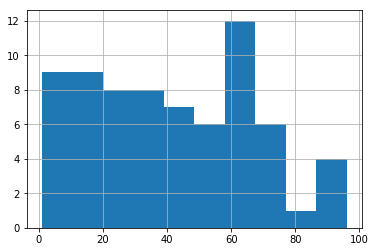

In [9]:
#df = dfo.copy()
# Convertir les champs de date en dates de pandas
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    df[c] = df[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filtre pour le traitement médical final pour tous les patients décédés
df = df[df.STOP==df.DEATHDATE]
df.sort_values(by="STOP", inplace=True)
df.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Créer le DEATHAGE 
# Il s'agit d'un calcul TRÈS approximatif de l'âge au décès
df["DEATHAGE"] = df.DEATHDATE.apply(lambda x: x.year) - df.BIRTHDATE.apply(lambda x: x.year)
# Et tirez la répartition des décès, divisée en n bacs
df["DEATHAGE"].hist(bins=10)

Créons un dataframe avec les champs suivants :

Les âges répartis dans les 10 fourchettes 
Comptage des raisons spécifiques de la visite à l'hôpital (à partir de la DESCRIPTION) pour chaque tranche d'âge, et décider de la manière de présenter cela 
Total de tous les coûts de la demande pour chaque tranche d'âge 
Médiane de tous les coûts des demandes de remboursement pour chaque tranche d'âge

In [11]:
df["DEATHAGE_classe"] = pd.cut(df["DEATHAGE"], bins=[1,10,20,30,40,50,60,70,80,90,100], include_lowest=True)

In [12]:
df1=df.groupby("DEATHAGE_classe")["DESCRIPTION"].agg(["value_counts"])
df1.head()

value_counts
DEATHAGE_classe DESCRIPTION                                       
(0.999, 10.0]   Death Certification                              8
                Emergency room admission (procedure)             1
(10.0, 20.0]    Death Certification                              4
                Cardiac Arrest                                   2
                Emergency Room Admission                         2

In [13]:
df2=df.groupby("DEATHAGE_classe")["TOTAL_CLAIM_COST"].agg(["sum","median"])
df2.head()

,sum,median
DEATHAGE_classe,,
"(0.999, 10.0]",1162.44,129.16
"(10.0, 20.0]",1420.76,129.16
"(20.0, 30.0]",774.96,129.16
"(30.0, 40.0]",1033.28,129.16
"(40.0, 50.0]",1033.28,129.16


In [14]:
df3=df2.join(df1)
df3.head()

sum  median  \
DEATHAGE_classe DESCRIPTION                                             
(0.999, 10.0]   Death Certification                   1162.44  129.16   
                Emergency room admission (procedure)  1162.44  129.16   
(10.0, 20.0]    Death Certification                   1420.76  129.16   
                Cardiac Arrest                        1420.76  129.16   
                Emergency Room Admission              1420.76  129.16   

                                                      value_counts  
DEATHAGE_classe DESCRIPTION                                         
(0.999, 10.0]   Death Certification                              8  
                Emergency room admission (procedure)             1  
(10.0, 20.0]    Death Certification                              4  
                Cardiac Arrest                                   2  
                Emergency Room Admission                         2

In [15]:
df3.rename(columns=
          {'value_counts':"Nombre de pers. ayant visité l'hopital classé par description et par tranche d'age",
           'sum':"Somme de tous les cout de la demandepar tranche d'age",
           'median':"Mediane des couts par tanche d'age"
          }, inplace=True
          )
df3

Somme de tous les cout de la demandepar tranche d'age  \
DEATHAGE_classe DESCRIPTION                                                                                         
(0.999, 10.0]   Death Certification                                                                   1162.44       
                Emergency room admission (procedure)                                                  1162.44       
(10.0, 20.0]    Death Certification                                                                   1420.76       
                Cardiac Arrest                                                                        1420.76       
                Emergency Room Admission                                                              1420.76       
                Myocardial Infarction                                                                 1420.76       
                Emergency room admission (procedure)                                                  1420.76       
(20.0, 30.0]    Emergency room admission (procedure)                                                   774.96       
                Cardiac Arrest                                                                         774.96       
                Emergency Room Admission                                                               774.96       
                General examination of patient (procedure)                                             774.96       
                Myocardial Infarction                                                                  774.96       
(30.0, 40.0]    Myocardial Infarction                                                                 1033.28       
                Emergency room admission (procedure)                                                  1033.28       
                Cardiac Arrest                                                                        1033.28       
                Emergency Room Admission                                                              1033.28       
                General examination of patient (procedure)                                            1033.28       
(40.0, 50.0]    Emergency room admission (procedure)                                                  1033.28       
                General examination of patient (procedure)                                            1033.28       
                Myocardial Infarction                                                                 1033.28       
                Stroke                                                                                1033.28       
(50.0, 60.0]    Death Certification                                                                   1162.44       
                Encounter for check up (procedure)                                                    1162.44       
                Cardiac Arrest                                                                        1162.44       
                Emergency Room Admission                                                              1162.44       
                General examination of patient (procedure)                                            1162.44       
                Inpatient stay (finding)                                                              1162.44       
                Stroke                                                                                1162.44       
(60.0, 70.0]    Myocardial Infarction                                                                 1291.60       
                Inpatient stay (finding)                                                              1291.60       
                Death Certification                                                                   1291.60       
                Emergency room admission (procedure)                                                  1291.60       
                Encounter for check up (procedure)                                

In [16]:
df[["DEATHDATE"]].describe()

,DEATHDATE
count,70
unique,70
top,1987-11-12
freq,1


In [17]:
df[["DEATHDATE"]].median()

Series([], dtype: float64)

In [18]:
df["DEATHAGE_classe"].head()

17464     (10.0, 20.0]
6574     (0.999, 10.0]
39451     (10.0, 20.0]
52548    (0.999, 10.0]
21413     (20.0, 30.0]
Name: DEATHAGE_classe, dtype: category
Categories (10, interval[float64]): [(0.999, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] ... (60.0, 70.0] < (70.0, 80.0] < (80.0, 90.0] < (90.0, 100.0]]

In [19]:
df.describe()

,TOTAL_CLAIM_COST,PAYER_COVERAGE,LAT,LON,DEATHAGE
count,7.000000e+01,70.000000,70.000000,70.000000,70.000000
mean,1.291600e+02,29.354286,42.226279,-71.273596,41.571429
std,8.588077e-14,36.734374,0.328108,0.759679,25.706014
min,1.291600e+02,0.000000,41.429154,-73.196885,1.000000
25%,1.291600e+02,0.000000,42.088690,-71.498591,19.250000
50%,1.291600e+02,0.000000,42.278371,-71.120600,42.000000
75%,1.291600e+02,64.160000,42.462125,-70.960382,61.000000
max,1.291600e+02,129.160000,42.746959,-69.941465,96.000000


In [20]:
df.shape

(70, 23)

In [21]:
df3.columns

Index(['Somme de tous les cout de la demandepar tranche d'age',
       'Mediane des couts par tanche d'age',
       'Nombre de pers. ayant visité l'hopital classé par description et par tranche d'age'],
      dtype='object')